In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### Data

In [2]:
features, labels = make_moons(n_samples=5000, random_state=42, noise=0.1)

In [3]:
features.shape, labels.shape

((5000, 2), (5000,))

In [4]:
features[:5]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

In [5]:
labels[:5]

array([0, 1, 1, 0, 0], dtype=int64)

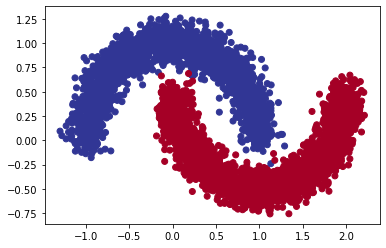

In [6]:
plt.scatter(features[:,0], features[:,1], c = labels, cmap = plt.cm.RdYlBu_r)

### Training

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(2, )))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 41,202
Trainable params: 41,202
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

In [10]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ['accuracy'])

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9496 - val_loss: 0.0076 - val_accuracy: 0.9968
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0184 - val_accuracy: 0.9944
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0058 - val_accuracy: 0.9976
Epoch 4/10
118/118 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9957 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 5/10
118/118 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0101 - val_accuracy: 0.9968
Epoch 6/10
118/118 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.0222 - val_accuracy: 0.9960
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0070 - val_accuracy: 0.9976
Epoch 

### Decision Boundary

In [12]:
def plot_decision_boundary(net, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    # Make predictions using the trained model
    y_pred = np.array(model(x_in)).argmax(axis=1)
    # Check for multi-class
    if y_pred[0].size > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


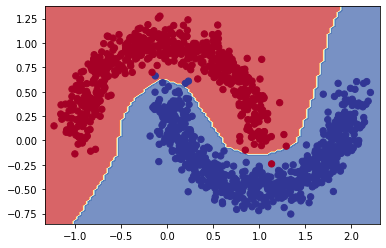

In [13]:
plot_decision_boundary(model, X_test, y_test)